# Simulation of Maxwell–Boltzmann distribution - Johnny Tse

This is a live document on the information regarding the Maxwell–Boltzmann distribution, as well as details to my implementation of a simulation which shows the Maxwell–Boltzmann distribution.

This simulation aims to simulate a system of ideal gas, and to plot out the particle's speed and energy distribution over time.

## Background

The Maxwell–Boltzmann distribution is a curve used to describe the distribution of particle's speed in ideal gas. It was first derived by Maxwell, and later rigorously studied by Boltzmann. According to the second law of thermodynamics, the entropy of an isolated system would never decrease. Initially, this is viewed as a fundemental postulate. Later on however, this observation is explained away using statistical mechanics, a mathematical approach to physics using statistics and probability. The Maxwell–Boltzmann distribution is one of the earliest discovery with statistical mechanics, which has been mathematically shown to maximize the entropy of an isolated system of ideal gas. Since entropy of a system cannot decrease, as such systems evolves over time, they would reach a particle distribution resembling the Maxwell–Boltzmann distribution.

## Note

Before you move on, it is CRUCIAL to understand that there are several "Maxwell–Boltzmann distribution" which are very similar in behaviour, but are fundementally very different things. There are Maxwell–Boltzmann distribution for different dimensions, namely 2D and 3D, and the x-axis of the graph could be the speed or the energy of the particles. to see why this matters, here are two graphs graphing the Maxwell–Boltzmann distribution in terms of the particles' speed and energy in 1D, 2D and 3D, extracted from "Sándor Nagy: Tricky Dimensions – a Spin-off of a Sim":

Speed            |Energy
:---------------:|:-----------------:
![alt text](Reference/Speed.png "Title")|![alt text](Reference/Energy.png "Title")

As you can see, the familiar Maxwell–Boltzmann distribution is actually a specific graph for the speed of molecules in 3D. It is quite unfortunate that many tend to get this wrong (even the syllabus uses the graph for speed when talking about activation energy even though it is more appropriate to use the graph for energy). An interesting note about the speed graph above is that in a 2D world, the initial gradient of 2D's curve is non-zero, whereasthe initial gradient of 3D's curve is zero. The syllabus might allow both, but it is technically wrong to draw it the 2D's way.

In the following simulation, the environment would be in 2D in order to simplify the calculation. This has the side effect of not accurately portraying the distribution in real life, since we live in a 3D world.

## Please run every block of code below

In [19]:
# The code's dependencies are declared here
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import timeit, time

from numba import jit

## Assumptions

In order for Maxwell–Boltzmann distribution to be observed, several assumptions have to be made:

- The particles should behave as idealized gases.
    - the particles have point masses
- The particles do not interact with each other
    - unless they collided for negligible time, which they collide elastically
- There are large amount of particles in the system


In this simulation, additional assumptions are made to the simulation in order to speed up and simplify calculation (these assumptions could override the assumptions made in the previous part, causing small deviations from the actual Boltzmann distribution):

- All units used are arbitary units
- The environment which the particles reside in is assumed to be a 1x1 square, where there is no wall. A particle touching the edge of the square would simply show up on the other side of the square.
- The particles modelled as very small discs of identical radius
- Each particle has mass 1


## Variable adjustments

To play around with the simulation, adjust the values below, which determines the radius of the particles, the number of particles, the velocity of the particle, and the time interval between each "frame" of the simulation. Generally, only the number of particles has to be varied.

In [20]:
#Variables to be adjusted
radius = 0.005
num = 200
velocity = 2
time_interval = 0.002

#Initializing the particles in the system
ball_list = np.empty([num, 2, 2])
for i in range(num):
    pos_init = np.random.rand(2)
    angle = np.random.random_sample()
    v_init = np.array([velocity*np.cos(angle*np.pi*2), velocity*np.sin(angle*np.pi*2)])
    ball_list[i] = [pos_init, v_init]
    
#Defining the function which updates the position of the particles after a certain time interval
@jit(nopython=True)
def movement_and_collision(time, ball_list):
    #each particle moves forward according to their velocity
    ball_list[:,0] = np.mod(ball_list[:,0] + time*ball_list[:,1], 1) 
    
    #the distance between each pair of particles are measured, and their velocities are adjusted as though they collided if their distance is close enough
    for x in range(len(ball_list)-1):
        for y in range(x+1, len(ball_list)):
            if np.linalg.norm(ball_list[x,0] - ball_list[y,0]) < 2*radius:
                # Relative velocity of between the two particles
                relative_velocity = ball_list[x,1] - ball_list[y,1]
                
                # The direction between the centers of the particles
                direction = (ball_list[x,0] - ball_list[y,0]) / np.linalg.norm(ball_list[x,0] - ball_list[y,0])
                
                #The change of velocity due force exerted during collision
                useful_speed = np.dot(relative_velocity, direction)

                ball_list[x,1] -= direction*useful_speed
                ball_list[y,1] += direction*useful_speed

    return ball_list

The following code creates three plots of the particle's position, speed and energy, which updates in real time.
Press the triangle to run the code and the square to stop it when the system stabilizes, exhibiting the Maxwell-Boltzmann distribution.

Please be aware that the axes are in arbitary unit, and thus carries no significant meaning other than the ratio.

<IPython.core.display.Javascript object>


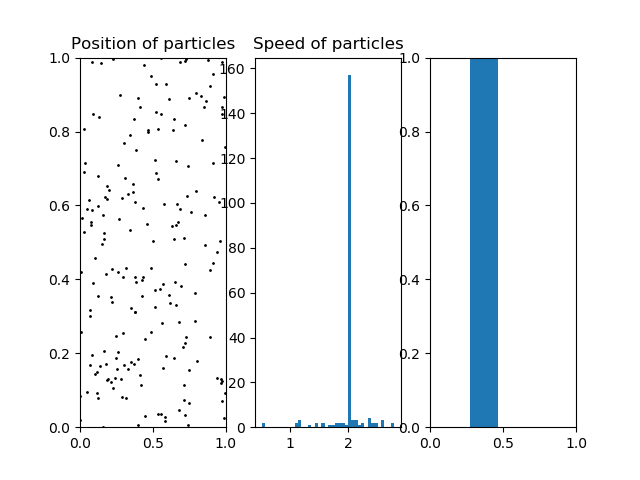

KeyboardInterrupt: 

In [21]:
#Initializing the plot
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
fig.show()

#Infinite loop which simulates the system over time
while True:
    #Updates the position of the particles after a certain time interval
    ball_list = movement_and_collision(time_interval, ball_list)
    items = ball_list[:,0]
    
    #Plotting the position, speed and energy of the particles
    ax1.clear()
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    ax1.plot(list(zip(*items))[0], list(zip(*items))[1], 'o', color='black', markersize=1)
    ax1.set_title('Position of particles')
    
    velocity_list = np.linalg.norm(ball_list[:,1,:], axis=1)
    energy_list = np.linalg.norm(ball_list[:,1,:], axis=1)**2 #Energy is proportional to the square of speed

    ax2.clear()
    ax2.hist(velocity_list, bins=40)
    ax2.set_title('Speed of particles')
    
    ax3.clear()
    ax3.hist(energy_list, bins=40)
    ax3.set_title('Energy of particles')
    
    fig.canvas.draw()